In [1]:
# Import all the actual code, this takes a while.
from functions import *

<h1>Guide</h1> <br>
<br>
<big>This notebook no longer has code in it.  Instead, use this for searching through data.</big><br>
<big>To see the actual code, see functions.py</big><br>
<br>
<big><b>Useful functions</b></big> (detailed explanations and examples below): <br>
<b>urban_slice</b>(df, target_state, high, low) <br>
<b>total_graph</b>(df, area)<br>
<b>age_graph</b>(df, area, threshold)<br>
<b>avg_age_graph</b>(df)<br>
<b>avg_pop_from_dict</b>(dictionary, high, low)<br>
<b>avg_pop_change_from_dict</b>(dictionary, high, low)<br>
<br>
You can pass functions in other functions(examples below)<br>
<br>
You can use any function with any state's dataframe, using stateabbreviation_df (e.g. co_df for Colorado)<br>
<br>
You can also iterate through groups of states.  The current groups are: <br>
<br>
All states where cannabis is currently illegal: <br>
<b>state_dict1</b><br>
<b>state_dict2</b><br>
<b>state_dict3</b><br>
(Jupyter Notebook will only generate ~20 plots at a time, so I had to arbitrarily split them up)<br>
<br>
States that legalized in 2012:<br>
<b>state_dict_2012</b><br>
<br>
States that legalized in 2014:<br>
<b>state_dict_2014</b><br>
<br>
States that legalized in 2016:<br>
<b>state_dict_2016</b><br>
<br>
And states that are expected to legalize in 2018: <br>
<b>state_dict_2018</b><br>
<br>
The keys in each of these dictionaries are the name of the state ('Colorado') and the values are the dataframes (co_df)

<big><big><b> Functions: </b></big></big>

<big>Function:  urban_slice </big><br>
Return a slice of the state dataframe only containing counties with a certain "urban percentage".

arguments:  (df, target_state, high, low) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
target_state =   State name in the form of a string (e.g. 'Colorado', 'Alaska') <br>
high         =   Upper-boundary of "urban percentage"<br>
low          =   Lower-boundary of "urban percentage"

In [ ]:
# Example
example = urban_slice(or_df, 'Oregon', 75, 50)
example.head()

<big><big><b>Function:  total_graph</b></big></big><br>
Generates a plot of total population over 2010-2016.  Not very useful unless used along with urban_slice.

arguments:  (df, area) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
area         =   Name of the area.  This will only appear in the title of the plot and doesn't matter much

In [ ]:
# Example
total_graph(co_df, "'Rado, Dude")

In [ ]:
# Much better example
total_graph(urban_slice(co_df, 'Colorado', 40, 20), "the rural parts of 'Rado, Derd")

<big><big><b>Function:  age_graph</b></big></big><br>
Generate a plot of population change over 2010-2016, separated by age group.

arguments:  (df, area, threshold) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>
area         =   Same as the total_graph function. Just for the plot title, doesn't matter much. <br>
threshold    =   This allows you to limit how many lines are drawn on the plot.  If you only want to see lines where the change in population over the 6 years (positive or negative) is %20, you would input 20 here.

In [ ]:
# Example
age_graph(ak_df, 'Alaska', 15)

<big><big><b>Function:  avg_age_graph</b></big></big><br>
Generate a plot of average age over 2010-2016.

arguments:  (df) <br>
df           =   Name of state's dataframe (e.g. co_df for colorado, ak_df for alaska) <br>


In [ ]:
# Example
avg_age_graph(urban_slice(wa_df, 'Washington', 50, 25))

<big><big><b>Iterating through dictionaries</b></big></big><br>
Just some examples.  Nothing too special here.

In [ ]:
# Iteration example
for key in state_dict3:
    high = 40
    low = 0
    try:
        total_graph(urban_slice(state_dict3[key], key, high, low), f"{key} in counties with urban percentage between {low} and {high} ")
    except:
        print(f'Error with {key}')

In [ ]:
# Another iteration example
for key in state_dict_2012:
    try:
        high = 100
        low = 90
        age_graph(urban_slice(state_dict_2012[key], key, high, low), key, 15)
    except:
        print(f'error with {key}')

<big><big><b>Function:  avg_pop_from_dict</b></big></big><br>
Generate a plot of average of total pops in ALL states in a given dictionary with a given urban percentage

arguments:  (dictionary, high, low) <br>
dictionary   =   Name of dictionary you would like to plot (e.g. state_dict1, state_dict_2012) <br>
high         =   Upper-boundary of "urban percentage"<br>
low          =   Lower-boundary of "urban percentage"

In [ ]:
# Example
avg_pop_from_dict(state_dict_2012, 40, 0)

<big><big><b>Function:  avg_pop_change_from_dict</b></big></big><br>
Same as last one, but goes by change in population rather than raw pop numbers.  Pay close attention to the y axis!

arguments:  (dictionary, high, low) <br>
dictionary   =   Name of dictionary you would like to plot (e.g. state_dict1, state_dict_2012) <br>
high         =   Upper-boundary of "urban percentage"<br>
low          =   Lower-boundary of "urban percentage"

In [ ]:
# Example
avg_pop_change_from_dict(state_dict_2012, 40, 0)

<h1>You can get rid of everything below this for room, but I think it's interesting</h1>

In [ ]:
avg_pop_from_dict(state_dict_2012, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict_2014, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict_2016, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict_2018, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict1, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict2, 40, 0)

In [ ]:
avg_pop_from_dict(state_dict3, 40, 0)

Alabama
Arizona
Arkansas
There are no entries in Connecticut for an urban percentage between 0 and 40
There are no entries in Delaware for an urban percentage between 0 and 40
Florida
Georgia
There are no entries in Hawaii for an urban percentage between 0 and 40
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
ValueError in Louisiana
Montana
Nebraska
New Hampshire
There are no entries in New Jersey for an urban percentage between 0 and 40
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Maryland
Michigan
Minnesota
Mississippi
Missouri
Pennsylvania
There are no entries in Rhode Island for an urban percentage between 0 and 40
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
ValueError in Virginia
West Virginia
Wisconsin
Wyoming


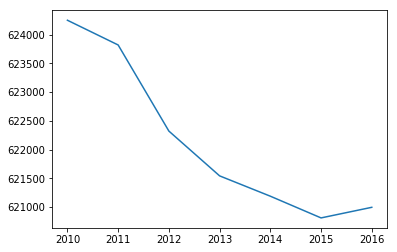

In [3]:
avg_pop_from_dict(state_dict_illegal, 40, 0)

Colorado
Washington
Alaska
There are no entries in District of Columbia for an urban percentage between 0 and 40
Oregon
California
ValueError in Maine
Nevada
There are no entries in Massachusetts for an urban percentage between 0 and 40


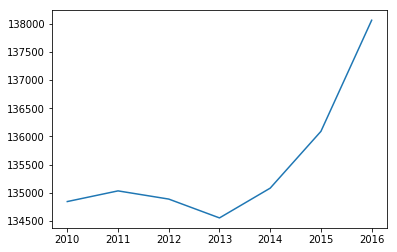

In [2]:
avg_pop_from_dict(state_dict_legal, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict_2012, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict_2014, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict_2016, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict_2018, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict1, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict2, 40, 0)

In [ ]:
avg_pop_change_from_dict(state_dict3, 40, 0)

Alabama
Arizona
Arkansas
There are no entries in Connecticut for an urban percentage between 0 and 40
There are no entries in Delaware for an urban percentage between 0 and 40
Florida
Georgia
There are no entries in Hawaii for an urban percentage between 0 and 40
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
ValueError in Louisiana
Montana
Nebraska
New Hampshire
There are no entries in New Jersey for an urban percentage between 0 and 40
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Maryland
Michigan
Minnesota
Mississippi
Missouri
Pennsylvania
There are no entries in Rhode Island for an urban percentage between 0 and 40
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
ValueError in Virginia
West Virginia
Wisconsin
Wyoming


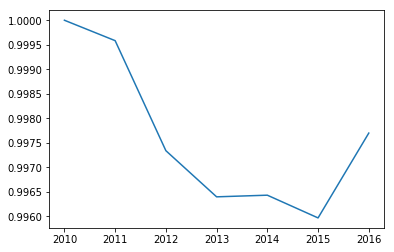

In [4]:
avg_pop_change_from_dict(state_dict_illegal, 40, 0)

Colorado
Washington
Alaska
There are no entries in District of Columbia for an urban percentage between 0 and 40
Oregon
California
ValueError in Maine
Nevada
There are no entries in Massachusetts for an urban percentage between 0 and 40


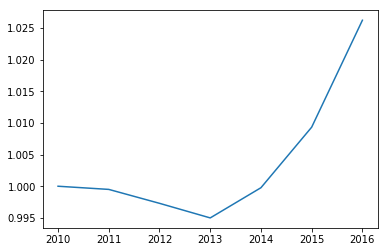

In [5]:
avg_pop_change_from_dict(state_dict_legal, 40, 0)